<h1 align='center'>
State Data<br>
<small>Optional exercise. Nonetheless, this notebook does not answer the questions. It's my own exploration of the data set</small>
</h1>
<img src='http://www.wallpaperama.com/post-images/forums/201401/22-p1592-50-states-usa-map.png' />

We often take data for granted. However, one of the hardest parts about analyzing a problem you're interested in can be to find good data to answer the questions you want to ask. As you're learning R, though, there are many datasets that R has built in that you can take advantage of.

In this problem, we will be examining the "state" dataset, which has data from the 1970s on all fifty US states. For each state, the dataset includes the population, per capita income, illiteracy rate, murder rate, high school graduation rate, average number of frost days, area, latitude and longitude, division the state belongs to,  region the state belongs to, and two-letter abbreviation.

- Population - the population estimate of the state in 1975
- Income - per capita income in 1974
- Illiteracy - illiteracy rates in 1970, as a percent of the population
- Life.Exp - the life expectancy in years of residents of the state in 1970
- Murder - the murder and non-negligent manslaughter rate per 100,000 population in 1976 
- HS.Grad - percent of high-school graduates in 1970
- Frost - the mean number of days with minimum temperature below freezing from 1931–1960 in the capital or a large city of the state
- Area - the land area (in square miles) of the state
- state.abb - a 2-letter abreviation for each state
- state.area - the area of each state, in square miles
- x - the longitude of the center of the state
- y - the latitude of the center of the state
- state.division - the division each state belongs to (New England, Middle Atlantic, South Atlantic, East South -  -- Central, West South Central, East North Central, West North Central, Mountain, or Pacific)
- state.name - the full names of each state
- state.region - the region each state belong to (Northeast, South, North Central, or West)

In [140]:
from IPython.display import display 
state = pd.read_csv('data/statedata.csv')  # state data in year 1975

display(state.head())
print(state.shape)

,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area,state.abb,state.area,x,y,state.division,state.name,state.region
0,3615,3624,2.1,69.05,15.1,41.3,20,50708,AL,51609,-86.7509,32.5901,East South Central,Alabama,South
1,365,6315,1.5,69.31,11.3,66.7,152,566432,AK,589757,-127.2500,49.2500,Pacific,Alaska,West
2,2212,4530,1.8,70.55,7.8,58.1,15,113417,AZ,113909,-111.6250,34.2192,Mountain,Arizona,West
3,2110,3378,1.9,70.66,10.1,39.9,65,51945,AR,53104,-92.2992,34.7336,West South Central,Arkansas,South
4,21198,5114,1.1,71.71,10.3,62.6,20,156361,CA,158693,-119.7730,36.5341,Pacific,California,West


(50, 15)


<h1 align='center' style='color: blue'>Investigating Murder</h1>

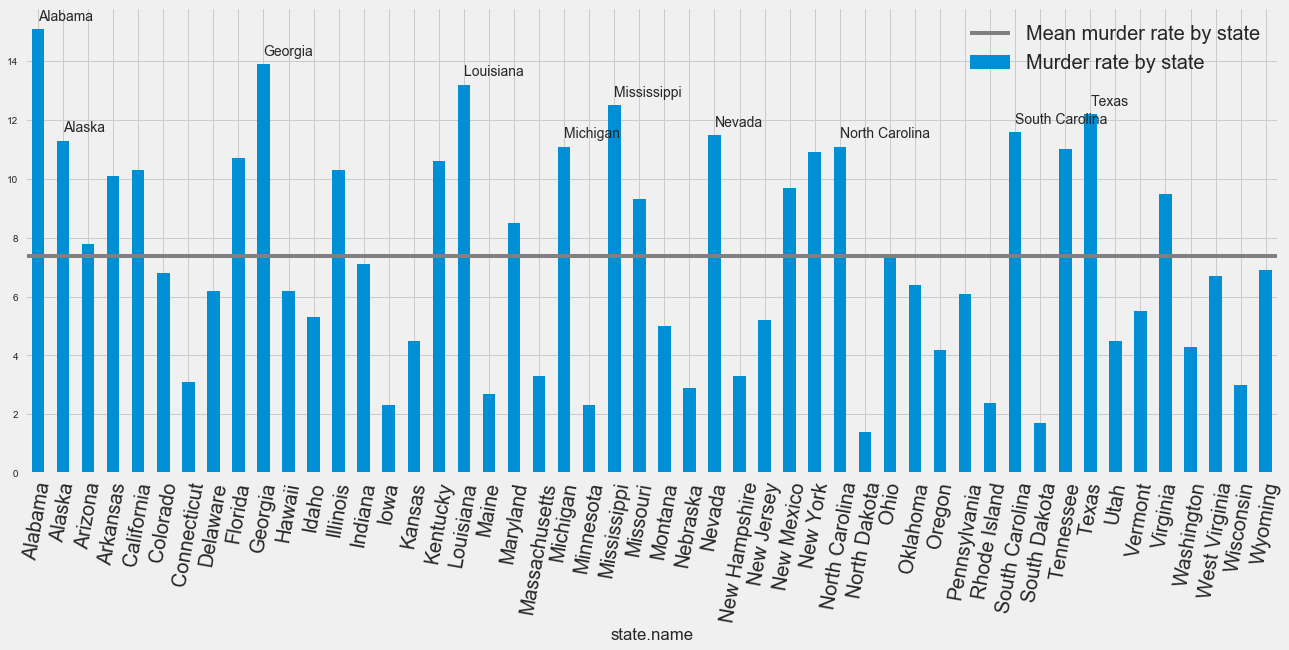

In [141]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
state.plot(x='state.name', y='Murder', kind='bar', label='Murder rate by state', ax=ax)

max_7 = state['Murder'].sort_values(ascending=False)[:10]
indices = max_7.index
states_by_murder = [state['state.name'].iloc[i] for i in indices]

for index, curr_state in zip(indices, states_by_murder):
    ax.annotate(s=f'{curr_state}',
                 xy=(index, max_7[index]),
                 xytext=(index, max_7[index]+0.3))
    
ax.set_xticklabels(state['state.name'].unique(), rotation=80, fontsize=20)

ax.axhline(state.Murder.mean(), color='gray', label='Mean murder rate by state')

plt.legend(fontsize=20)
plt.show();

# g = sns.FacetGrid(state, size=9)
# g.map(sns.barplot, 'state.name', 'Murder')
# g.ax.set_xticklabels(labels=state['state.name'].unique(), rotation=75)
# max_7 = state['Murder'].sort_values(ascending=False)[:7]
# indices = [state['Murder'].index[state['Murder'] == i][0] for i in max_7]
# states_by_murder = [state['state.name'].iloc[i] for i in indices]
# for index, curr_state in zip(indices, states_by_murder):
#     g.ax.annotate(s=f'{curr_state}',
#                  xy=(index, max_7[index]),
#                  xytext=(index, max_7[index]+0.3))
# g.ax.set_title('Top 7 states by murder rate')
# sns.plt.show()

<h3>A) Relationship between murder rates and Income, Illiteracy, Life.Exp, HS.Grad and oddly enough Frost</h3>

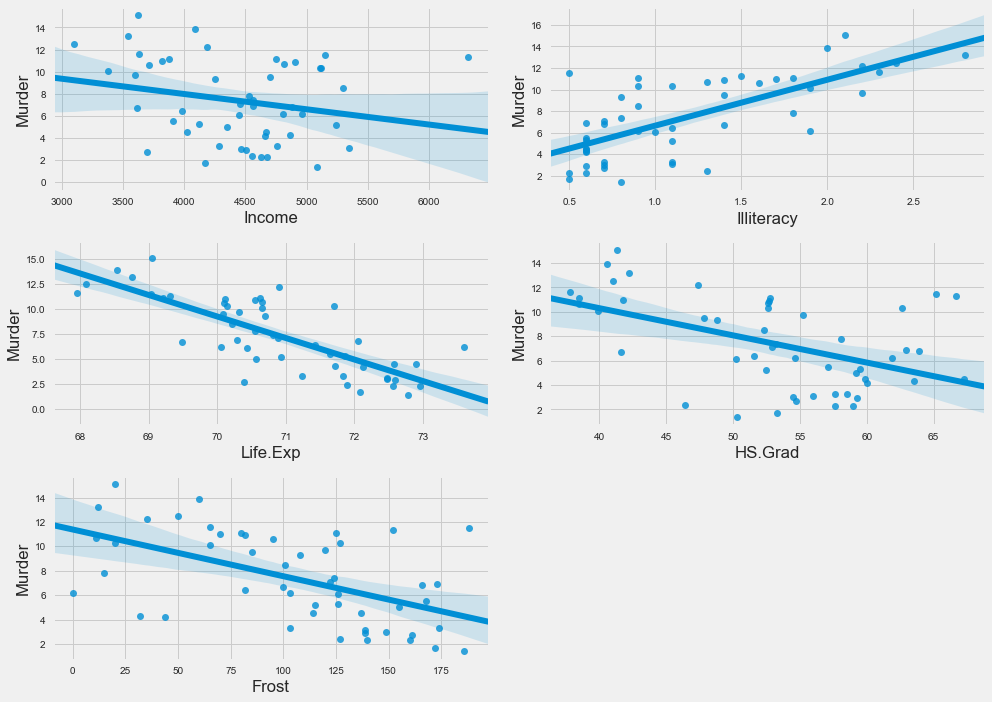

In [142]:
colnames = ['Income', 'Illiteracy', 'Life.Exp', 'HS.Grad', 'Frost']
fig = plt.figure()

for index, name in enumerate(colnames):
    ax = fig.add_subplot(3, 2, index+1)
    reg = sns.regplot(name, 'Murder', data=state, ax=ax)
    reg.figure.set_size_inches(14, 10)

sns.plt.tight_layout()
sns.plt.show()

We see that Murder has an inverse relation with life expectancey, frost, high school graduation rates and income.<br>
Out of these negative correlations, life expectancy stands out as having strongest negative correlation with murder rates (-0.78).<br>
On the other hand, income has the weakest correlation with murder at -0.23.<br>
Meaning that as these features increase, murder rates drops in each state.<br>
The only feature that has a positive relation with murder is illiteracy.<br>
Meaning that as illiteracy rates increase, murder rates also increases.<br>

I find it amusing when minimum temperature is below freezing points, even criminals don't feel like working.
Add to that that most people tend to stay indoors during such harsh weather. Hence, there are a lot of witnesses around which is not exactly ideal when wanting to kill someone.

Let's see the strength of these relations

In [143]:
murder_corr = state.corr()['Murder']
murder_corr[['Income', 'Illiteracy', 'Life.Exp', 'HS.Grad', 'Frost']].sort_values(ascending=False)

Illiteracy    0.702975
Income       -0.230078
HS.Grad      -0.487971
Frost        -0.538883
Life.Exp     -0.780846
Name: Murder, dtype: float64

<h1 align='center' style='color: blue'>Income</h1>

- I'm expecting common sense relations as to how Income relates to high school graduation rates and illiteracy.<br>
- I'm interested in taking a look at how income relates with population and life expectancy.<br>
- I don't expect a relation between murder and temperature.<br>
- The relationship between income and murder rates is an intersting one indeed, but we have already seen in the<br> previous section that as murder increases, income decrease, slightly. <del>Reversing the axes will just reverse the<br> relationship into a positive one.</del> Nope!!. It'll just stay the same<br>


Let's plot.

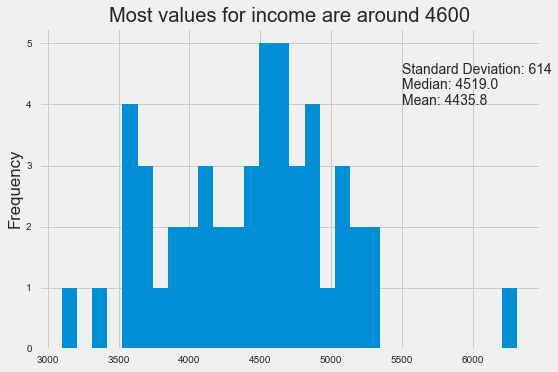

In [144]:
state.Income.plot(kind='hist', bins=30)
plt.title('Most values for income are around 4600')

# values
mean = round(state.Income.mean(), 3)
median = round(state.Income.median(), 3)
std = round(state.Income.std())

# dictify
d = dict({'Mean': mean, 'Median': median, 'Standard Deviation': std})

x = 1
for key, value in d.items():
    plt.annotate(s=f'{key}: {value}', xy=(5500, 5-x))
    x -=0.25
    
plt.show()

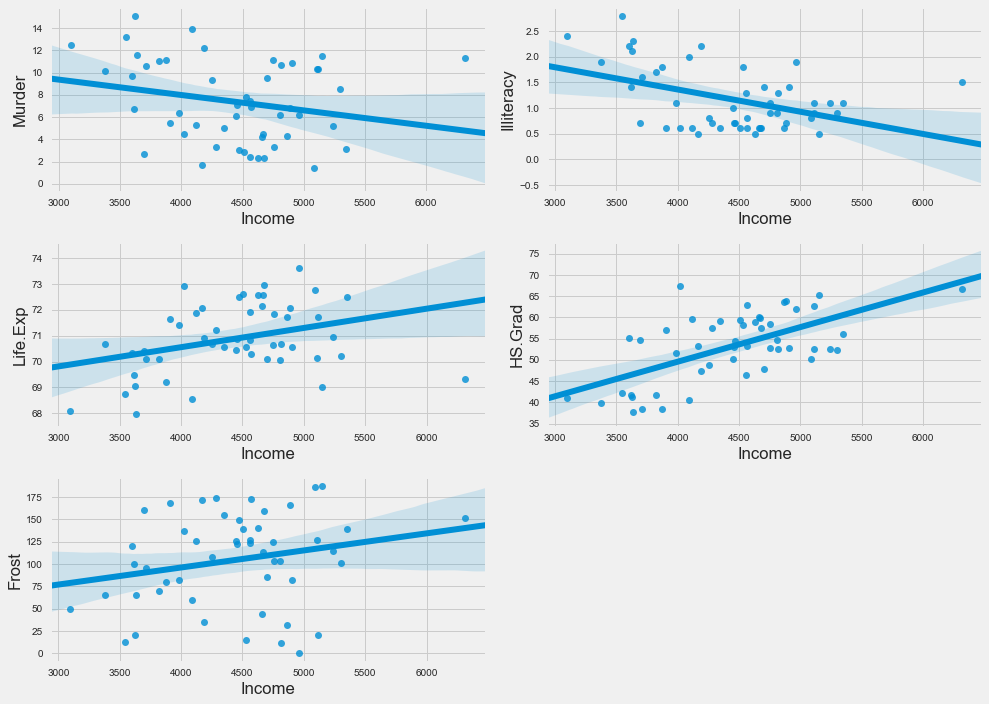

In [145]:
colnames = ['Murder', 'Illiteracy', 'Life.Exp', 'HS.Grad', 'Frost']
fig = plt.figure()

for index, name in enumerate(colnames):
    ax = fig.add_subplot(3, 2, index+1)
    reg = sns.regplot('Income', name, data=state, ax=ax)
    reg.figure.set_size_inches(14, 10)

sns.plt.tight_layout()
sns.plt.show()

Just as expected. Life expectency increases with Income<br>
Not surprisengly, murder and income are negatively correlated.<br>

There's some ambiguity in the the plots.<br>
- The effect of income on the illiteracy rates is not as enlightening as the other way around. <br> How does the illiteracy rates affects the income.
- The same applies to high school graduation rates with Income.

A meaningless plot is the one between Income and Frost. The plot is telling us that as Income increases, the mean number of days below freezing increases.<br>

Let's fix the the Income vs HS.Grad and Income vs Illiteracy

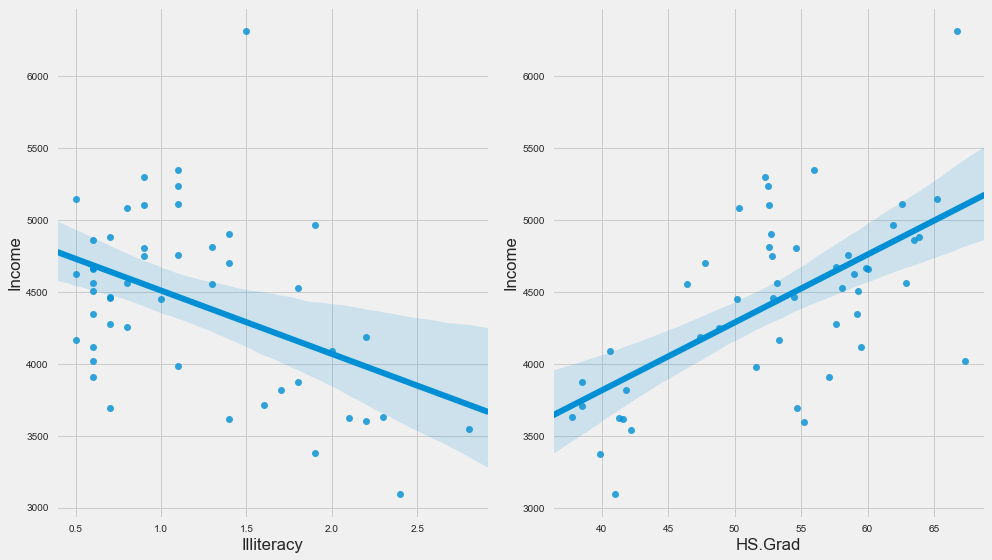

In [146]:
fig = plt.figure()

for index, colname in enumerate(['Illiteracy', 'HS.Grad']):
    ax = fig.add_subplot(1, 2, index+1)
    reg = sns.regplot(colname, 'Income', data=state, ax=ax)
    reg.figure.set_size_inches(14, 8)
    
sns.plt.tight_layout()
sns.plt.show()

This is more like it. Illiteracy has a negative impact on the per capita income of the state.<br>As illiteracy increase, income decreases.<br>On the other hand, as the number of high school graduation percentage increases, the per capita income of the state increases.

Let's now take a look at the states by their per capita income

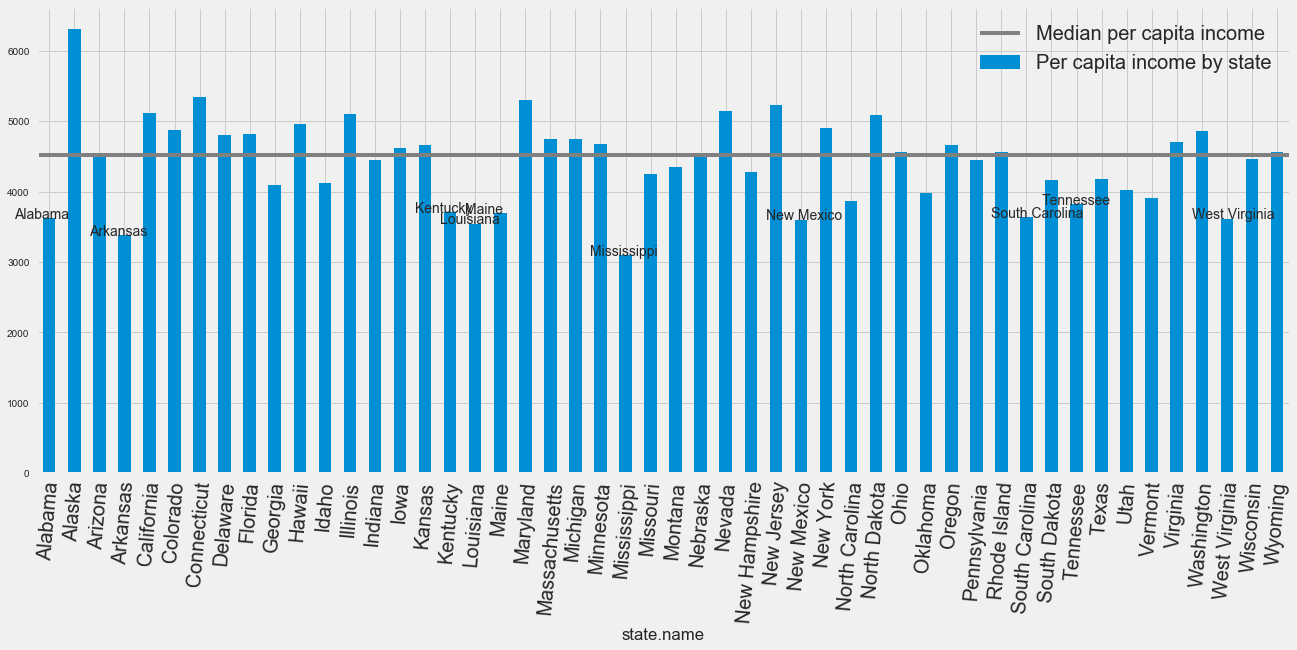

In [147]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))

state.plot(x='state.name', y='Income', kind='bar', label='Per capita income by state', ax=ax)
ax.set_xticklabels(state['state.name'], rotation=85, fontsize=20)
ax.axhline(median, color='gray', label='Median per capita income')


# max_7 = state['Income'].sort_values(ascending=False)[:10]
# indices = max_7.index
# max_states = [state['state.name'].iloc[i] for i in indices]

# for index, curr_state in zip(indices, max_states):
#     ax.annotate(s=f'{curr_state}',
#                  xy=(index, max_7[index]),
#                  xytext=(index, max_7[index]+0.3))
 

min_7 = state['Income'].sort_values()[:10]
min_indices = min_7.index
min_states  = [ state['state.name'][i] for i in min_indices ]
   
for index, curr_state in zip(min_indices, min_states):
    ax.annotate(s=f'{curr_state}',
                 xy=(index, min_7[index]),
                 xytext=(index-1.4, min_7[index]+0.3))
    
    
plt.legend(fontsize=20)
plt.show()

In [148]:
s = set(states_by_murder)
losers = s.intersection(set(min_states))
losers

{'Alabama', 'Louisiana', 'Mississippi', 'South Carolina'}

So far, these states are not doing well at all. They are in the 10 highest states by murder rates, and the lowest 10 states by per capita income.

---

I keep scrolling up to see the dataframe, so I like to remind myself every once in a while what am I dealing with.<br> Also it's easy to forget oneself in numbers and plots.

In [149]:
state.head()

,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area,state.abb,state.area,x,y,state.division,state.name,state.region
0,3615,3624,2.1,69.05,15.1,41.3,20,50708,AL,51609,-86.7509,32.5901,East South Central,Alabama,South
1,365,6315,1.5,69.31,11.3,66.7,152,566432,AK,589757,-127.2500,49.2500,Pacific,Alaska,West
2,2212,4530,1.8,70.55,7.8,58.1,15,113417,AZ,113909,-111.6250,34.2192,Mountain,Arizona,West
3,2110,3378,1.9,70.66,10.1,39.9,65,51945,AR,53104,-92.2992,34.7336,West South Central,Arkansas,South
4,21198,5114,1.1,71.71,10.3,62.6,20,156361,CA,158693,-119.7730,36.5341,Pacific,California,West


---

<h1 align='center'>Illiteracy</h1>

We already know the relation how illiteracy affects income and murder. The higher the illiteracy rates, the lower the per capita of the state, and the higher the murder rate of the state.

Let's see what's the relationship between high school graduation and illiteracy? <br>
I expect that as high school graduation rates increases, illiteracy rates drops. <br>
That seems to me like an obvious correlation.<br>

I expect there's a negative correlation between illiteracy and life expectancy.<br>
I think that the more illiterate a person is, the more he will not take good care of himself and his health.<br>

Let's see if the data agrees.

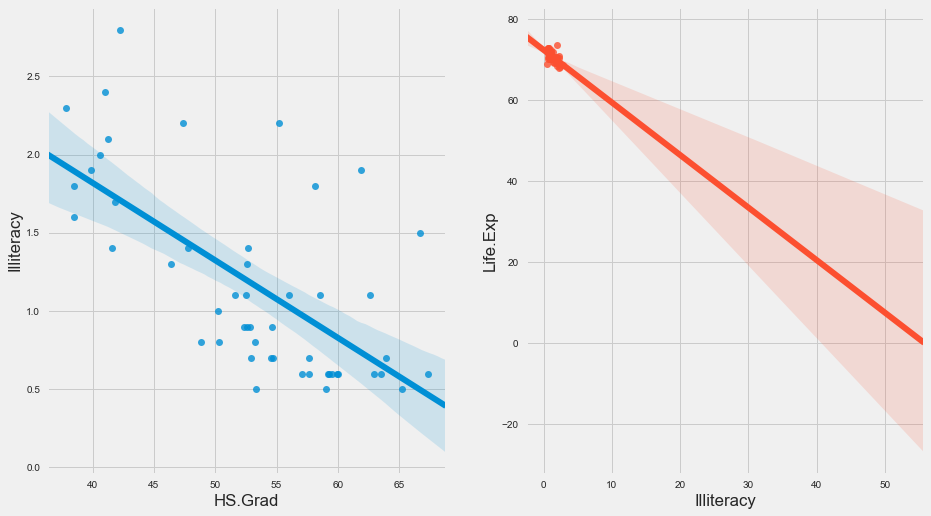

In [150]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))

sns.regplot('HS.Grad', 'Illiteracy', data=state, ax=ax1)
sns.regplot('Illiteracy', 'Life.Exp', data=state, ax=ax2)

sns.plt.show()

As expected, as high school graduation rates increase, illiteracy rates drops.<br>
But what about the plot beteween illiteracy and life expectancy?<br>
All of the observations in the scatter plot is concentrated in one single area. <br>

I don't know why is that? <br>
Let me take a better look at the values of both axes.

In [151]:
print(state.Illiteracy.describe(), end='\n\n')
print(state['Life.Exp'].describe())

count    50.000000
mean      1.170000
std       0.609533
min       0.500000
25%       0.625000
50%       0.950000
75%       1.575000
max       2.800000
Name: Illiteracy, dtype: float64

count    50.000000
mean     70.878600
std       1.342394
min      67.960000
25%      70.117500
50%      70.675000
75%      71.892500
max      73.600000
Name: Life.Exp, dtype: float64


Look at the describe method of both columns, it appears that both columns have very small ranges of values.<br>
Illiteracy has a range [0.5, 2.8], and HI.Grad has a range of [68, 74].

I think the problem here is that while the ranges were small, the plot x-axis and y-axis limits were large.<br>
While Illiteracy's range is [0.5, 2.8], the x-axis goes from 0 to 50.<br>
And while Life.Exp's range is [68, 74], the y-axis goes from 0 to 80.<br>

Let's fix that.

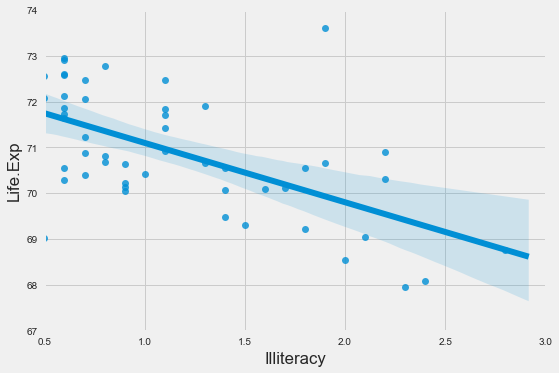

In [152]:
reg = sns.regplot('Illiteracy', 'Life.Exp', data=state)
reg.set(xlim=(0.5, 3),
        ylim=(67, 74))
sns.plt.show()

Good good.

Lets now look at the life illiteracy rates by state.

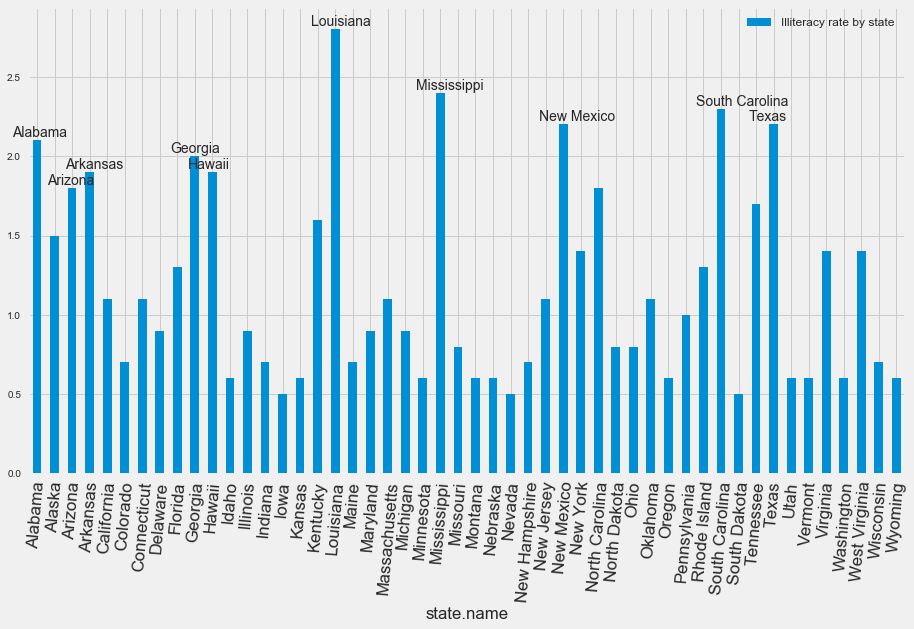

In [153]:
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
state.plot(x='state.name', y='Illiteracy', kind='bar', label='Illiteracy rate by state', ax=ax)
ax.set_xticklabels(labels=state['state.name'].unique(), rotation=85, fontsize=17)

max_7 = state.Illiteracy.sort_values(ascending=False)[:10]
illiterate_states = [state['state.name'][i] for i in max_7.index]

for index, curr_state in zip(max_7.index, illiterate_states):
    ax.annotate(f'{curr_state}',
                xy=(index, max_7[index]),
                xytext=(index-1.4, max_7[index]+0.02))

p.axhline(state.Illiteracy.mean(), color='gray', label='Mean of illiteracy rates')
plt.legend(fontsize=12)
plt.show()

In [154]:
losers = set(literate_states).intersection(losers)
losers

{'Alabama', 'Louisiana', 'Mississippi', 'South Carolina'}

The usual suspects pop up again.

If you live in one of these states and it's 1975, then may god have mercy on your soul.